In [5]:
# carregando os dados do Iris Dataset com sklearn
from sklearn import datasets
iris = datasets.load_iris()
# obtendo as entradas e saídas
X, y = iris.data, iris.target
print(len(X))
print(len(y))

150
150


In [7]:
from pybrain.datasets.classification import ClassificationDataSet

dataset = ClassificationDataSet(4, 1, nb_classes=3)

# adicionando as amostras
for i in range(len(X)):
    dataset.addSample(X[i], y[i])
    
len(dataset)

150

In [8]:
dataset['input']

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [9]:
dataset['target']

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [10]:
len(dataset['target'])

150

In [15]:
# particionando os dados para treinamento
train_data, part_data = dataset.splitWithProportion(0.6)
print('Quantidade para treino: %d' % len(train_data))

# dividindo os dados para teste e validação
test_data, val_data = part_data.splitWithProportion(0.5)
print('Quantidade para teste: %d' % len(test_data))
print('Quantidade para validação: %d' % len(val_data))

Quantidade para treino: 90
Quantidade para teste: 30
Quantidade para validação: 30


In [29]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(dataset.indim, 3, dataset.outdim)
trainer = BackpropTrainer(net, dataset=train_data, learningrate=0.01, momentum=0.1, verbose=True)
train_errors, val_errors = trainer.trainUntilConvergence(dataset=train_data, maxEpochs=100)

Total error:  2.09109044494
Total error:  0.236268155769
Total error:  0.155072508949
Total error:  0.131834795059
Total error:  0.113511073779
Total error:  0.100786408945
Total error:  0.0866186884989
Total error:  0.0805151464648
Total error:  0.0726385246855
Total error:  0.0663227774715
Total error:  0.0602835099679
Total error:  0.0554659451677
Total error:  0.0527778176106
Total error:  0.0478297437219
Total error:  0.0467531807796
Total error:  0.0432297482861
Total error:  0.0416563295319
Total error:  0.0389247525218
Total error:  0.0377831083817
Total error:  0.0352721419871
Total error:  0.0345200112887
Total error:  0.0339833889479
Total error:  0.0329551229621
Total error:  0.0325092598052
Total error:  0.0317049517995
Total error:  0.0307806171902
Total error:  0.0294937966949
Total error:  0.029481957807
Total error:  0.0292579351967
Total error:  0.0276990783166
Total error:  0.0293416230706
Total error:  0.0263418583243
Total error:  0.0238725708845
Total error:  0.02

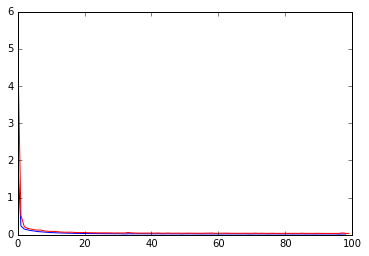

101

In [31]:
import matplotlib.pyplot as plt

plt.plot(train_errors, 'b', val_errors, 'r')
plt.show()

trainer.totalepochs

In [32]:
trainer.trainOnDataset(train_data, 500)

Total error:  0.0248254123643
Total error:  0.0270759970807
Total error:  0.0248743614902
Total error:  0.0262878590057
Total error:  0.0255158986751
Total error:  0.0269127897609
Total error:  0.0241729347135
Total error:  0.024622997443
Total error:  0.027000759499
Total error:  0.0270012902702
Total error:  0.0258521088693
Total error:  0.0258354771397
Total error:  0.0262764146403
Total error:  0.0255534411593
Total error:  0.0253479593901
Total error:  0.0263704115301
Total error:  0.0259932636516
Total error:  0.0255632441609
Total error:  0.0255030530778
Total error:  0.0259774273026
Total error:  0.0245486468194
Total error:  0.0236173073423
Total error:  0.024534815025
Total error:  0.0232701690428
Total error:  0.0258287081491
Total error:  0.0252564209266
Total error:  0.0253254420455
Total error:  0.0224063496554
Total error:  0.022127030737
Total error:  0.0245552193931
Total error:  0.0243510714683
Total error:  0.0245724247653
Total error:  0.0238709960859
Total error:  

In [33]:
out = net.activateOnDataset(test_data)
for i in range(len(out)):
    print('out: %f, correct: %f' % (out[i], test_data['target'][i]))

out: 0.678695, correct: 1.000000
out: 2.087630, correct: 2.000000
out: 1.956473, correct: 2.000000
out: 2.139766, correct: 2.000000
out: 0.829725, correct: 1.000000
out: 2.004660, correct: 2.000000
out: 1.953471, correct: 2.000000
out: 0.012639, correct: 0.000000
out: 0.058640, correct: 0.000000
out: 1.281219, correct: 1.000000
out: 1.145850, correct: 1.000000
out: 0.873923, correct: 1.000000
out: 1.021071, correct: 1.000000
out: 0.009878, correct: 0.000000
out: 1.681490, correct: 2.000000
out: 1.947861, correct: 2.000000
out: 0.022935, correct: 0.000000
out: 0.007164, correct: 0.000000
out: 0.011360, correct: 0.000000
out: 0.013945, correct: 0.000000
out: 1.283549, correct: 1.000000
out: 1.692263, correct: 1.000000
out: 0.007327, correct: 0.000000
out: 0.006249, correct: 0.000000
out: 1.829961, correct: 2.000000
out: 2.023753, correct: 2.000000
out: 1.775074, correct: 2.000000
out: 1.373190, correct: 1.000000
out: 0.018844, correct: 0.000000
out: 1.174393, correct: 1.000000
